In [10]:
from sdRDM import DataModel
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

from CaliPytion.tools.standardcurve import StandardCurve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
test_data, lib = DataModel.parse(path="linear_test.json")
test_data

Calibration(id='calibration0', reactant_id='s0', date=datetime.datetime(2023, 3, 14, 0, 0), pH=7.0, temperature=25.0, temperature_unit='C', device=Device(id='device0', manufacturer='IBTB', model='photo 3000', software_version=None), standard=[Standard(id='standard0', wavelength=420.0, concentration=[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0], concentration_unit='umole / l', absorption=[Series(id='series0', values=[0.2, 0.6000000000000001, 1.0, 1.4, 1.8, 2.2, 2.6, 3.0000000000000004]), Series(id='series0', values=[0.33, 1.23, 2.13, 3.03, 3.9299999999999997, 4.83, 5.7299999999999995, 6.63])])], spectrum=Spectrum(id='spectrum0', concentration=2.0, wavelength=[300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 370.0, 380.0, 390.0, 400.0], concentration_unit='umole / l', absorption=[Series(id='series1', values=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])]), result=None)

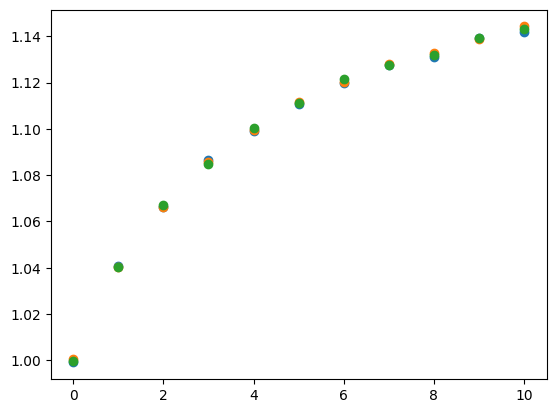

In [50]:
def poly(x,a,b,c):
    return a*x / (b+x)

a=0.2
b=4
c=2

conc = np.linspace(0,10,11)
abso = poly(x = conc,a=a,b=b,c=c)
data = np.tile(abso, 3).reshape((3,len(conc)))

for i in range(len(data)):
    data[i] = data[i] + np.random.normal(1,0.001, len(conc))

for d in data:
    plt.scatter(conc,d)

In [52]:
standard = lib.Standard(wavelength=420, concentration=list(conc),
                        conc_unit="mmole / l",
                        absorption = [lib.Series(values=x.tolist()) for x in data])

calibration = lib.Calibration(reactant_id="s0", pH=7, temperature=37,
                              temperature_unit="C", standard=[standard])



Found calibration data at 420.0 nm
Standard curve data was blanked.
{'a': 0.017535509775328095}
-247.0421636322171
{'b': 0.03211238758470046, 'a': -0.0018552389947550508}
-331.7871367600477
{'c': 0.04138225101540622, 'b': -0.0048181270430589776, 'a': 0.0002129174959864156}
-409.1839900163802
{'b': 0.10000000010452266, 'a': 2.652391592581052e-16}
4157.720064536108
{'b': 3.973967818771651, 'a': 0.19988841845676605}
-468.19979381654906


TypeError: 'Equality' object is not callable

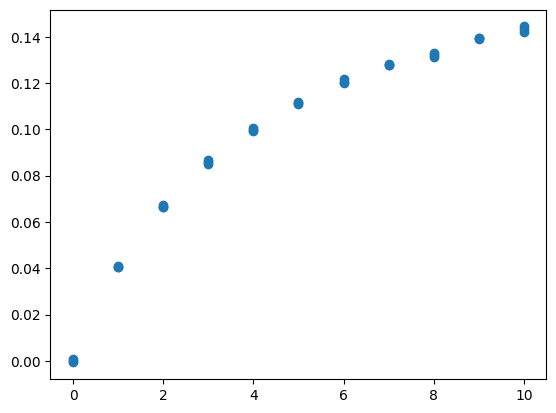

In [80]:
standard_curve = StandardCurve.from_calibration_datamodel(calibration)

for model in standard_curve.models.values():
    print(model.params)
    print(model.aic)

standard_curve.visualize()